In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import os
os.chdir('/content/drive/My Drive/X-ray-20231027T074754Z-002/X-ray')

import shutil


source_directory = '/content/drive/My Drive/X-ray-20231027T074754Z-002'


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Source images: https://drive.google.com/drive/folders/1ifSi8ojOkDG7VnVBcMBn4WxGTODmOhkn?usp=sharing

## DATA VISUALIZATION

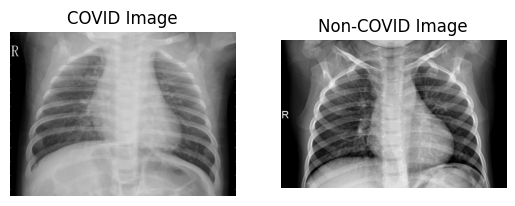

In [ ]:
import os
import matplotlib.pyplot as plt
from PIL import Image

# Define the path to the directory containing COVID and Non-COVID images
dataset_path = '//content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray'

# Define paths to random COVID and Non-COVID images
covid_image_path = os.path.join(dataset_path, 'COVID', os.listdir(os.path.join(dataset_path, 'COVID'))[2])
non_covid_image_path = os.path.join(dataset_path, 'Non-COVID', os.listdir(os.path.join(dataset_path, 'Non-COVID'))[602])

# Load and display the COVID image in black and white
covid_image = Image.open(covid_image_path)
plt.subplot(1, 2, 1)
plt.title("COVID Image")
plt.imshow(covid_image, cmap='gray')
plt.axis('off')

# Load and display the Non-COVID image in color
non_covid_image = Image.open(non_covid_image_path)
plt.subplot(1, 2, 2)
plt.title("Non-COVID Image")
plt.imshow(non_covid_image, cmap='gray')
plt.axis('off')

plt.show()


## IMAGE ENHANCEMENT USING HISTOGRAM EQUILIZATION

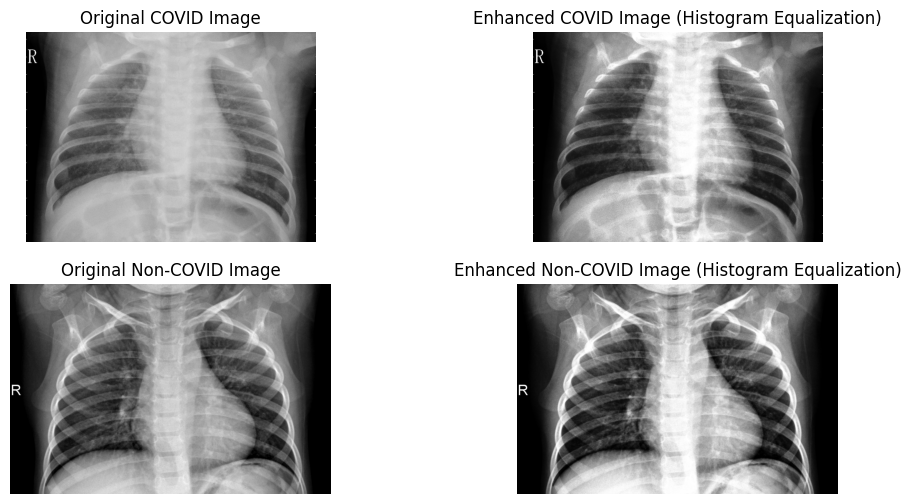

In [ ]:
import cv2

# Load the COVID image
covid_image = cv2.imread(covid_image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization to the COVID image
covid_image_equalized = cv2.equalizeHist(covid_image)

# Load the Non-COVID image
non_covid_image = cv2.imread(non_covid_image_path, cv2.IMREAD_GRAYSCALE)

# Apply histogram equalization to the Non-COVID image
non_covid_image_equalized = cv2.equalizeHist(non_covid_image)

# Display the enhanced images
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.title("Original COVID Image")
plt.imshow(covid_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.title("Enhanced COVID Image (Histogram Equalization)")
plt.imshow(covid_image_equalized, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.title("Original Non-COVID Image")
plt.imshow(non_covid_image, cmap='gray')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.title("Enhanced Non-COVID Image (Histogram Equalization)")
plt.imshow(non_covid_image_equalized, cmap='gray')
plt.axis('off')

plt.show()


## ENHANCING ALL THE IMAGES AND SAVING THEM IN DIRECTORY(DO NOT RUN THIS CELL)

In [ ]:
# import cv2
# import os
# from PIL import Image

# # Define the path to the directory containing COVID and Non-COVID images
# dataset_path = '/content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray'

# # Create directories to store the enhanced images
# enhanced_covid_dir = os.path.join(dataset_path, 'Enhanced_COVID_Images')
# os.makedirs(enhanced_covid_dir, exist_ok=True)

# enhanced_non_covid_dir = os.path.join(dataset_path, 'Enhanced_Non-COVID_Images')
# os.makedirs(enhanced_non_covid_dir, exist_ok=True)

# # Function to apply histogram equalization to an image
# def apply_histogram_equalization(image_path):
#     image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
#     equalized_image = cv2.equalizeHist(image)
#     return equalized_image

# # Process and save all COVID images
# covid_dir = os.path.join(dataset_path, 'COVID')
# for filename in os.listdir(covid_dir):
#     if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Process various image formats
#         image_path = os.path.join(covid_dir, filename)
#         enhanced_image = apply_histogram_equalization(image_path)
#         enhanced_pil_image = Image.fromarray(enhanced_image)

#         # Save the enhanced image with "enhanced_" prefix to the Enhanced_COVID_Images folder
#         enhanced_pil_image.save(os.path.join(enhanced_covid_dir, 'enhanced_' + filename))

# # Process and save all Non-COVID images
# non_covid_dir = os.path.join(dataset_path, 'Non-COVID')
# for filename in os.listdir(non_covid_dir):
#     if filename.lower().endswith(('.jpg', '.jpeg', '.png')):  # Process various image formats
#         image_path = os.path.join(non_covid_dir, filename)
#         enhanced_image = apply_histogram_equalization(image_path)
#         enhanced_pil_image = Image.fromarray(enhanced_image)

#         # Save the enhanced image with "enhanced_" prefix to the Enhanced_Non-COVID_Images folder
#         enhanced_pil_image.save(os.path.join(enhanced_non_covid_dir, 'enhanced_' + filename))


## DATA PREPROCESSING

In [ ]:
import os
import cv2
import pandas as pd

# Define the path to the directory containing COVID and Non-COVID images
#dataset_path = '/content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray'

# Create lists to store file paths and labels
data = []
labels = []

# Process COVID images
covid_dir = os.path.join(dataset_path, 'Enhanced_COVID_Images')
for filename in os.listdir(covid_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        data.append(os.path.join(covid_dir, filename))
        labels.append('COVID-POSITIVE')

# Process Non-COVID images
non_covid_dir = os.path.join(dataset_path, 'Enhanced_Non-COVID_Images')
for filename in os.listdir(non_covid_dir):
    if filename.lower().endswith(('.jpg', '.jpeg', '.png')):
        data.append(os.path.join(non_covid_dir, filename))
        labels.append('COVID-NEGATIVE')

# Create a DataFrame
data = pd.DataFrame({'Data': data, 'Label': labels})

# Display the DataFrame
print(data.head())
print(labels[1])

                                                Data           Label
0  //content/drive/MyDrive/X-ray-20231027T074754Z...  COVID-POSITIVE
1  //content/drive/MyDrive/X-ray-20231027T074754Z...  COVID-POSITIVE
2  //content/drive/MyDrive/X-ray-20231027T074754Z...  COVID-POSITIVE
3  //content/drive/MyDrive/X-ray-20231027T074754Z...  COVID-POSITIVE
4  //content/drive/MyDrive/X-ray-20231027T074754Z...  COVID-POSITIVE
COVID-POSITIVE


In [ ]:
data.shape

(2083, 2)

In [ ]:
num_samples_to_check = 10  # Adjust this number as needed

for i in range(num_samples_to_check):
    print(f"Data: {data.iloc[i]['Data']}")
    print(f"Label: {data.iloc[i]['Label']}")
    print()


Data: //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_COVID_Images/enhanced_aug_353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB._avg_0.jpg
Label: COVID-POSITIVE

Data: //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_COVID_Images/enhanced_aug_covid-19-pneumonia-14-PA_PL_4.jpg
Label: COVID-POSITIVE

Data: //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_COVID_Images/enhanced_aug_covid-19-pneumonia-14-PA_avg_0.jpg
Label: COVID-POSITIVE

Data: //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_COVID_Images/enhanced_aug_353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB._PL_2.jpg
Label: COVID-POSITIVE

Data: //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_COVID_Images/enhanced_aug_353889E0-A1E8-4F9E-A0B8-F24F36BCFBFB._PL_1.jpg
Label: COVID-POSITIVE

Data: //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_COVID_Images/enhanced_aug_covid-19-pneumonia-15-PA_avg_0.jpg
Label: COVID-POSITIVE

Data: //content/drive/MyDriv

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Define image dimensions
image_height = 150
image_width = 150
num_channels = 2
# Create an ImageDataGenerator with preprocessing and augmentation options
datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    fill_mode='nearest'
)


In [ ]:
data.shape

(2083, 2)

Image shape for //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_Non-COVID_Images/enhanced_Non-COVID-19 (346).jpeg: (1024, 1024, 3)
Image shape for //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_COVID_Images/enhanced_16660_1_1.jpg: (787, 902, 3)
Image shape for //content/drive/MyDrive/X-ray-20231027T074754Z-002/X-ray/Enhanced_Non-COVID_Images/enhanced_Non-COVID-19 (20).jpg: (1024, 1024, 3)


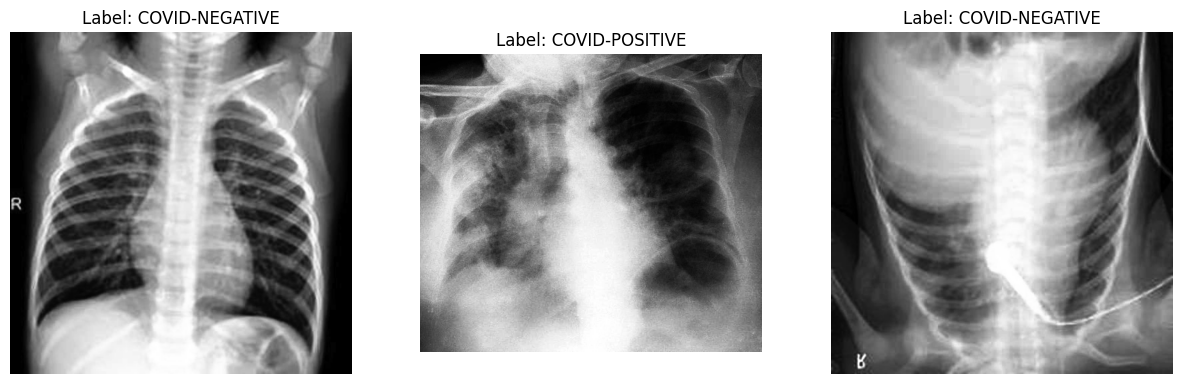

In [ ]:
# Choose 3 random image indices
random_indices = random.sample(range(data.shape[0]), 3)
image_directory = '/content/drive/My Drive/X-ray-20231027T074754Z-002/X-ray'

# Get the random image paths
random_image_paths = data[random_indices]  # Remove the square brackets

# Create a subplot with 1 row and 3 columns
plt.figure(figsize=(15, 5))
for i, random_image_path in enumerate(random_image_paths, 1):
    plt.subplot(1, 3, i)

    # Unpack the path and label
    image_path, label = random_image_path

    # Load the image
    image = cv2.imread(os.path.join(image_directory, image_path))

    if image is not None:
        print(f"Image shape for {image_path}: {image.shape}")
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        plt.imshow(image)
        plt.title(f'Label: {label}')
        plt.axis('off')
    else:
        print(f"Error loading image: {image_path}")

plt.show()


In [ ]:
data.shape

(2083, 2)

In [ ]:
import cv2
import numpy as np
import concurrent.futures
from tqdm import tqdm
import pandas as pd

# Assuming 'data' is a pandas DataFrame with the 'Data' column
# data = pd.DataFrame({'Data': [data]})  # Replace [...] with your data

# Assuming the 'Data' column is in the first column (index 0)
data_column_index = 0
data_column = data[:, data_column_index].astype(str)  # Use array indexing here

# Define the number of channels
num_channels = 2

# Define the target size for resizing
target_size = (150, 150)

# Function to process an image with error handling and logging
def process_image(image_path):
    try:
        img = cv2.imread(image_path)
        img = cv2.resize(img, target_size)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        return img
    except Exception as e:
        # print(f"Error processing image: {image_path}")
        # print(f"Error message: {str(e)}")
        return None

num_workers = 3

# Create an empty array to store the processed images
X = np.empty((len(data), *target_size, num_channels))
with concurrent.futures.ThreadPoolExecutor(max_workers=num_workers) as executor:
    futures = [executor.submit(process_image, image_path) for image_path in data_column]
    for i, future in enumerate(tqdm(concurrent.futures.as_completed(futures), total=len(data), unit='image', desc='Processing images')):
        img = future.result()
        if img is not None:
            X[i, :, :, 0] = img
            X[i, :, :, 1] = img

# X is now a NumPy array with shape (number_of_images, 150, 150, 2)
print(X.shape)


Processing images: 100%|██████████| 2083/2083 [00:38<00:00, 54.65image/s]

(2083, 150, 150, 2)


In [ ]:
X

array([[[[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  0.,   0.],
         [  0.,   0.],
         [  0.,   0.]],

        ...,

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  6.,   6.],
         [  5.,   5.],
         [  5.,   5.]],

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  5.,   5.],
         [  5.,   5.],
         [  5.,   5.]],

        [[  0.,   0.],
         [  0.,   0.],
         [  0.,   0.],
         ...,
         [  6.,   6.],
         [  4.,   4.],
         [  4.,   4.]]],


       [[[  4.,   4.],
         [  4.,   4.],
         [  4.

In [ ]:
X = X/255

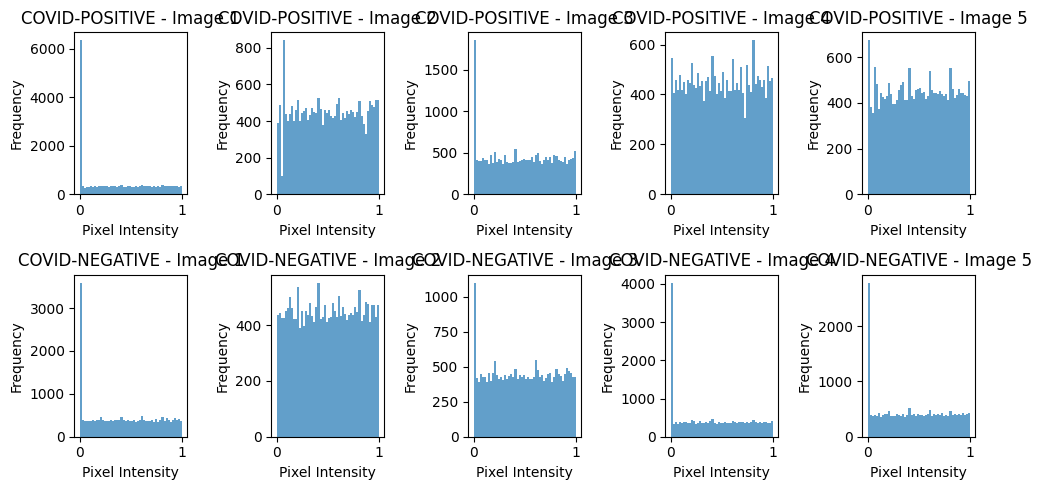

In [ ]:
import random

# Number of images to display for each class
num_images_to_display = 5

plt.figure(figsize=(10, 5))

for i, label in enumerate(['COVID-POSITIVE', 'COVID-NEGATIVE']):
    indices = np.where(labels == label)[0]
    random_indices = random.sample(indices.tolist(), num_images_to_display)

    for j, index in enumerate(random_indices, 1):
        plt.subplot(2, num_images_to_display, i * num_images_to_display + j)
        img = X[index, :, :, 0]  # Assuming you are working with grayscale images
        intensity_values = img.ravel()
        plt.hist(intensity_values, bins=50, alpha=0.7, label=f'Image {j}')
        plt.xlabel('Pixel Intensity')
        plt.ylabel('Frequency')
        plt.title(f'{label} - Image {j}')

plt.tight_layout()
plt.show()


       Mean    Median    StdDev  Skewness  Kurtosis Labels
0  0.471106  0.474510  0.305788  0.024774 -1.237122      O
1  0.502104  0.505882  0.285303 -0.042217 -1.238509      O
2  0.510066  0.505882  0.291937  0.000378 -1.203744      O
3  0.503080  0.501961  0.290308 -0.004562 -1.219283      O
4  0.497038  0.501961  0.303875 -0.004244 -1.197243      O


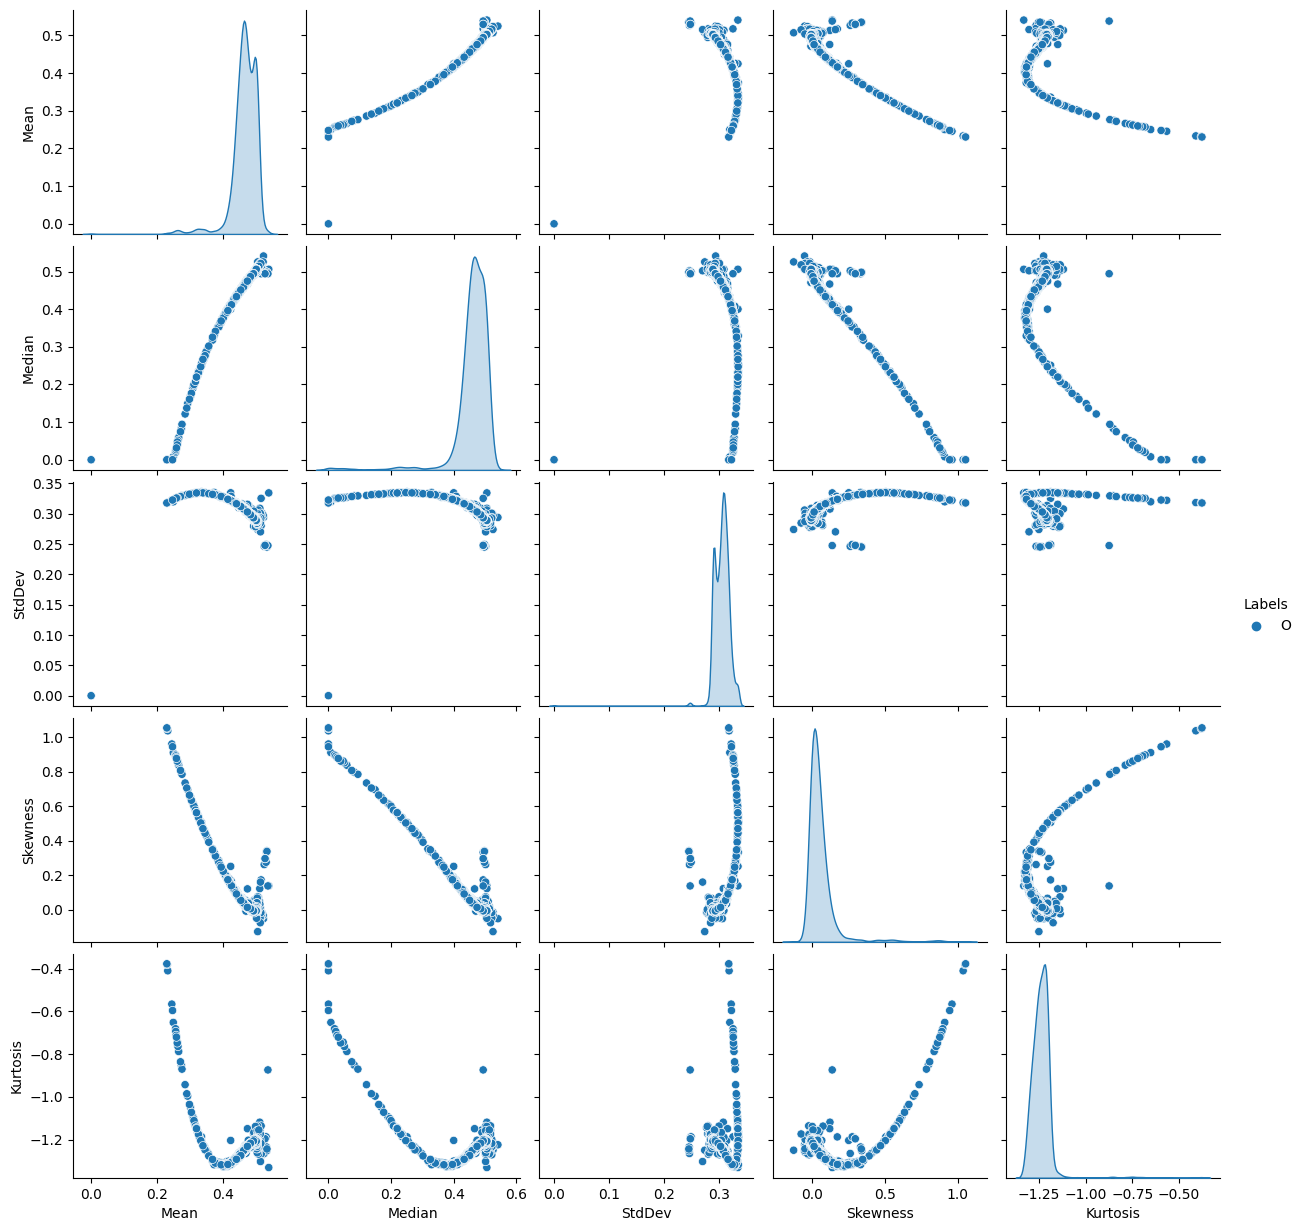

In [ ]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

# Function to calculate additional pixel intensity features
def calculate_additional_pixel_intensity_features(image):
    flattened_image = image.flatten()
    mean_intensity = np.mean(flattened_image)
    median_intensity = np.median(flattened_image)
    std_dev_intensity = np.std(flattened_image)
    skewness_intensity = skew(flattened_image)
    kurtosis_intensity = kurtosis(flattened_image)
    return mean_intensity, median_intensity, std_dev_intensity, skewness_intensity, kurtosis_intensity

# Lists to store features and labels
additional_pixel_intensity_features = []

# Process and compute additional pixel intensity features for all images
for index in range(len(data)):
    image = X[index, :, :, 0]  # Assuming you are working with grayscale images

    # Ensure the labels array has the correct length
    if index < len(labels):
        labels = labels[index]

    # Calculate additional pixel intensity features
    features = calculate_additional_pixel_intensity_features(image)

    # Append features to the list
    additional_pixel_intensity_features.append(features)

# Convert the lists to NumPy arrays
additional_pixel_intensity_features_array = np.array(additional_pixel_intensity_features)

# Create a DataFrame
df_additional_pixel_intensity = pd.DataFrame(additional_pixel_intensity_features_array, columns=['Mean', 'Median', 'StdDev', 'Skewness', 'Kurtosis'])
df_additional_pixel_intensity['Labels'] = labels[:len(additional_pixel_intensity_features)]

# Display the DataFrame
print(df_additional_pixel_intensity.head())

# Visualize the distribution of features
sns.pairplot(df_additional_pixel_intensity, hue='Labels', diag_kind='kde')
plt.show()


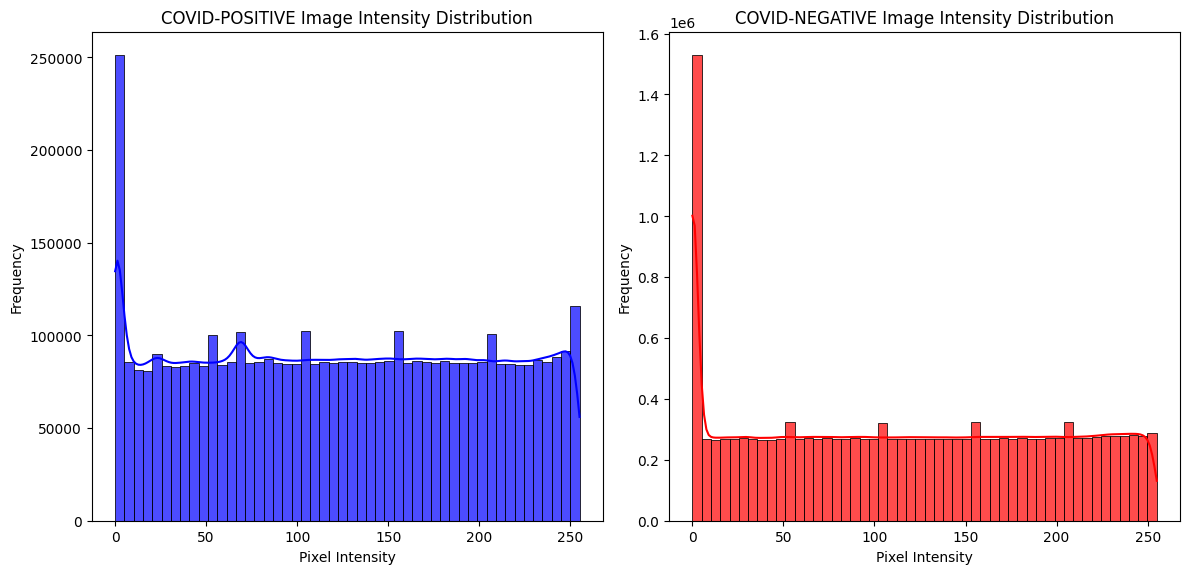

In [ ]:
import cv2
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load and preprocess an image
def load_and_preprocess_image(image_path, target_size=(100, 100)):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    if img is not None:
        img = cv2.resize(img, target_size)
    return img

plt.figure(figsize=(12, 6))

for i, label in enumerate(['COVID-POSITIVE', 'COVID-NEGATIVE']):
    plt.subplot(1, 2, i + 1)
    images = data[data[:, 1] == label][:1500, 0]  # Assuming the column indices for 'Data' and 'Label' are 0 and 1
    intensity_values = []

    for image_path in images:
        img = load_and_preprocess_image(image_path)
        if img is not None:
            intensity_values.extend(img.ravel())

    # Plot histogram using Seaborn for better aesthetics
    sns.histplot(intensity_values, bins=50, color='b' if i == 0 else 'r', alpha=0.7, kde=True)

    plt.xlabel('Pixel Intensity')
    plt.ylabel('Frequency')
    plt.title(f'{label} Image Intensity Distribution')

plt.tight_layout()
plt.show()



## FEATURE EXTRACTION

<ipython-input-99-8fd4414a145e>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
<ipython-input-99-8fd4414a145e>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
<ipython-input-99-8fd4414a145e>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)
<ipython-input-99-8fd4414a145e>:10: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It wi

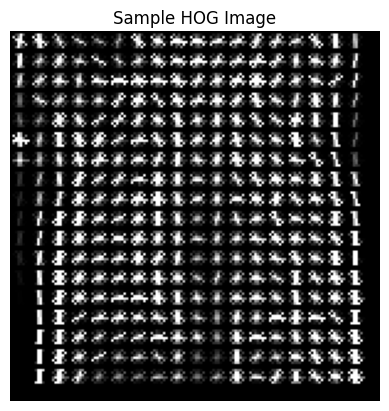

In [ ]:


import os
import cv2
import numpy as np
from skimage.feature import hog
from skimage import exposure

# Function to compute HOG features for an image
def compute_hog_features(image):
    # Compute HOG features
    features, hog_image = hog(image, pixels_per_cell=(8, 8), cells_per_block=(2, 2), visualize=True, multichannel=False)


    hog_image = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    return features, hog_image

# List to store computed HOG features and HOG images
hog_features_list = []
hog_images_list = []

# Process and compute HOG features for all images
for image_path in images:
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    image = cv2.resize(image, target_size)

    # Compute HOG features and HOG image
    features, hog_image = compute_hog_features(image)

    # Append features and HOG image to the lists
    hog_features_list.append(features)
    hog_images_list.append(hog_image)

# Convert the lists to NumPy arrays
hog_features_array = np.array(hog_features_list)
hog_images_array = np.array(hog_images_list)

# Display a sample HOG image
sample_hog_image = hog_images_array[0]
plt.imshow(sample_hog_image, cmap='gray')
plt.title('Sample HOG Image')
plt.axis('off')
plt.show()


In [ ]:
labels_array = np.array(labels)
print(labels[800])

COVID-NEGATIVE


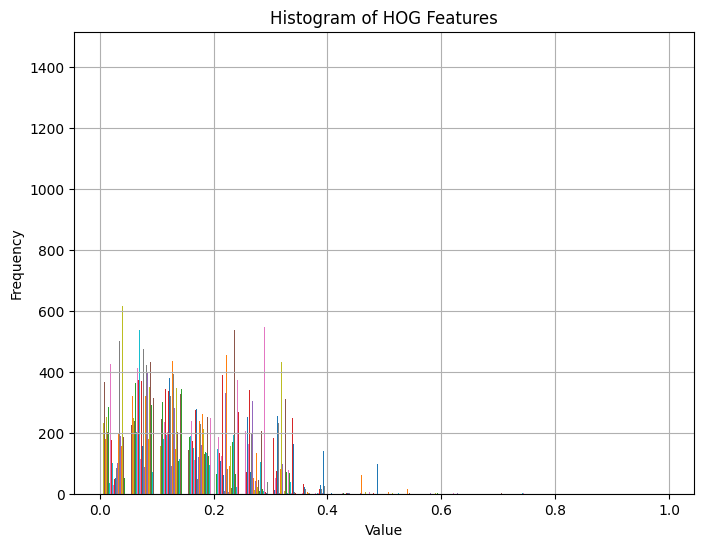

In [ ]:
import matplotlib.pyplot as plt

# Assuming hog_features_array is a 1D array
hog_features = hog_features_array

plt.figure(figsize=(8, 6))
plt.hist(hog_features, bins=20)  # Adjust the number of bins as needed
plt.title('Histogram of HOG Features')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid()
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(hog_features_array, labels_array[:1500], test_size=0.2, random_state=42)


In [ ]:

unique_classes_train = np.unique(y_train)
print("Unique Classes in Training Data:", unique_classes_train)


Unique Classes in Training Data: ['COVID-NEGATIVE' 'COVID-POSITIVE']


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
# Create an SVM model
svm_model = SVC(kernel='rbf', random_state=42)

# Train the SVM model on the training data
svm_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'SVM Model Accuracy: {accuracy}')

SVM Model Accuracy: 0.8266666666666667


In [ ]:
import numpy as np
import cv2
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming X_train, X_test, y_train, y_test are already defined with shape (samples, height, width, channels)

# Reshape the data to (samples, height * width * channels)
X_train_reshaped = X_train.reshape(X_train.shape[0], -1)
X_test_reshaped = X_test.reshape(X_test.shape[0], -1)

# Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_test_scaled = scaler.transform(X_test_reshaped)

# Models
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Support Vector Machine': SVC(kernel='linear', random_state=42),
    'K-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    classification_rep = classification_report(y_test, y_pred)

    print(f'Model: {name}')
    print(f'Accuracy: {accuracy}')
    print(f'Confusion Matrix:\n{conf_matrix}')
    print(f'Classification Report:\n{classification_rep}')
    print('---------------------')


Model: Logistic Regression
Accuracy: 0.81
Confusion Matrix:
[[187  21]
 [ 36  56]]
Classification Report:
                precision    recall  f1-score   support

COVID-NEGATIVE       0.84      0.90      0.87       208
COVID-POSITIVE       0.73      0.61      0.66        92

      accuracy                           0.81       300
     macro avg       0.78      0.75      0.77       300
  weighted avg       0.80      0.81      0.80       300

---------------------
Model: Support Vector Machine
Accuracy: 0.7933333333333333
Confusion Matrix:
[[186  22]
 [ 40  52]]
Classification Report:
                precision    recall  f1-score   support

COVID-NEGATIVE       0.82      0.89      0.86       208
COVID-POSITIVE       0.70      0.57      0.63        92

      accuracy                           0.79       300
     macro avg       0.76      0.73      0.74       300
  weighted avg       0.79      0.79      0.79       300

---------------------
Model: K-Nearest Neighbors
Accuracy: 0.7466666666

In [ ]:
from tensorflow.keras.models import save_model
import joblib

# Assuming svm_model is the variable containing your trained SVM model
svm_model = SVC(kernel='linear', random_state=42)  # You have this line in your code

# ... (your SVM training code)

# Save the trained SVM model using joblib
joblib.dump(svm_model, '/content/drive/My Drive/X-ray-20231027T074754Z-002/svm_model1.joblib')


['/content/drive/My Drive/X-ray-20231027T074754Z-002/svm_model1.joblib']